In [1]:
import numpy 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
numpy.random.seed(10)

In [2]:
all_df = pd.read_csv("data/data2.csv")

In [3]:
X=all_df.drop(['readmitted'], axis=1).values.astype('float64')
Y = all_df['readmitted'].values.astype('int64')

In [4]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 
len(train_Features)

78441

In [5]:
train_Features = train_Features.reshape((train_Features.shape[0], train_Features.shape[1], 1))

In [6]:
test_Features = test_Features.reshape((test_Features.shape[0], test_Features.shape[1], 1))

In [7]:
from keras.utils import np_utils
train_Label = train_Label.reshape(train_Label.shape[0], 1)
test_Label= test_Label.reshape(test_Label.shape[0], 1)
train_Label=np_utils.to_categorical(train_Label)
test_Label=np_utils.to_categorical(test_Label)

Using TensorFlow backend.


In [8]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [9]:
model = Sequential()

In [10]:
model.add(LSTM(units=70, input_shape=(70,1)))

In [11]:
model.add(Dense(2, activation = "sigmoid"))

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 70)                20160     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 142       
Total params: 20,302
Trainable params: 20,302
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [14]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=60, 
                         batch_size=1500,verbose=1,callbacks=[early_stopping])

Train on 62752 samples, validate on 15689 samples
Epoch 1/60
62752/62752 [==============================] - 73s 1ms/step - loss: 0.6910 - acc: 0.5325 - val_loss: 0.6911 - val_acc: 0.5306
Epoch 2/60
62752/62752 [==============================] - 49s 779us/step - loss: 0.6904 - acc: 0.5353 - val_loss: 0.6893 - val_acc: 0.5308
Epoch 3/60
62752/62752 [==============================] - 49s 782us/step - loss: 0.6831 - acc: 0.5571 - val_loss: 0.6864 - val_acc: 0.5436
Epoch 4/60
62752/62752 [==============================] - 49s 776us/step - loss: 0.6806 - acc: 0.5637 - val_loss: 0.6797 - val_acc: 0.5648
Epoch 5/60
62752/62752 [==============================] - 57s 903us/step - loss: 0.6795 - acc: 0.5691 - val_loss: 0.6792 - val_acc: 0.5684
Epoch 6/60
62752/62752 [==============================] - 49s 779us/step - loss: 0.6785 - acc: 0.5698 - val_loss: 0.6783 - val_acc: 0.5670
Epoch 7/60
62752/62752 [==============================] - 50s 791us/step - loss: 0.6793 - acc: 0.5670 - val_loss: 0.67

In [15]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

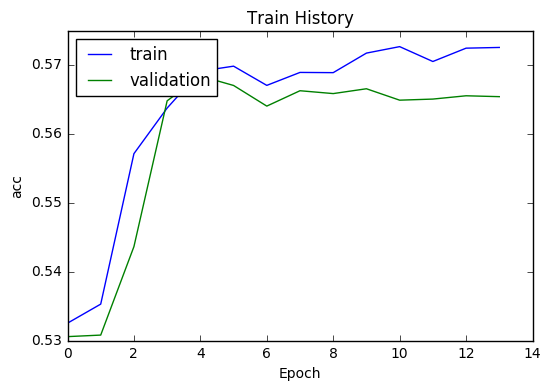

In [16]:
show_train_history(train_history,'acc','val_acc')

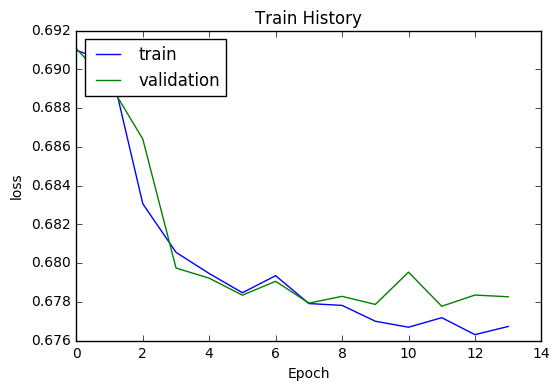

In [17]:
show_train_history(train_history,'loss','val_loss')

In [18]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

19611/19611 [==============================] - 9s 434us/step


In [19]:
scores[1]

0.5614960991250011